# Explorando Datasets con *pandas* and Matplotlib<a id="0"></a>

Herramientas: El curso depende fuertemente de [**pandas**](http://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) y [**Numpy**](http://www.numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) para el manejo de información, análisis, y visualización. La principal librería que usaremos para gráficar en este curso es [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

Dataset: Inmigración a Canada desde 1980 a 2013 - [Flujo de migración internacional desde y hacia los países seleccionados - revisión del 2015](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) de la pagina web de las Naciones Unidas .

el dataset contiene información del flujo de migración internacional registrado por los países de destino. la información presenta ambos flujos entrada y salida de acuerdo al lugar de nacimiento, ciudadanía o lugar previo / siguiente residencia para ambos extranjeros y nacionales. Para esta lección, nos concentraremos en la migración de Canda.

# Descargando y preparando la información <a id="2"></a>


Importamos los módulos primarios. la primera cosa que haremos es importar los dos módulos importantes para el análisis de datos: pandas y numpy.

In [1]:
import numpy as np
import pandas as pd

Descargamos el dataset de la inmigración Canadiense y lo leemos desde un dataframe de pandas.

In [2]:
import io
import urllib.request

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
resp = urllib.request.urlopen(URL)


if resp.getcode()==200:
    content = resp.read()
    df_can = pd.read_excel(io.BytesIO(content),
        sheet_name='Canada by Citizenship',
        skiprows=range(20),
        skipfooter=2)
    print('Data downloaded and read into a dataframe!')
else:
    print("Error al descargar el archivo")

Data downloaded and read into a dataframe!


Demos le una mirada a los primeros cinco items en nuestro dataset.

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Veamos cuantas entradas tiene nuestro dataset

In [4]:
print(df_can.shape)

(195, 43)


Limpiaremos los datos. Haremos algunas modificaciones al conjunto de datos original para que sea más fácil crear nuestras visualizaciones. Consulta el laboratorio `Introducción a Matplotlib y los gráficos de líneas` para obtener una descripción detallada y justificada de los cambios.

#### 1. Limpiando el dataset para remover las columnas que no son informativas para nosotros para la visualización(ej. Type, AREA, REG).


In [5]:
df_can.drop(["AREA", "REG","DEV","Type","Coverage"],axis=1, inplace=True)

#Veamos los primeros cinco elementos y veamos como ha cambiado el dataframe
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Nota como las columnas Type, Coverage, AREA, REG, and DEV fueron removidas del dataframe

#### 2. Renombraremos algunas columnas para que asi tengan sentido.

In [6]:
df_can.rename(columns={"OdName":"Country", "AreaName":"Continent","RegName":"Region"}, inplace=True)

#Veamos los primeros cinco elementos del dataframe para ver como ha cambiado.
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Notas como los nombres de las columnas ahora tienen mas sentido incluso para alguien que es de afuera.

#### 3. Para una mayor consistencia, asegúrate de que todas los rótulos de las columnas sean de tipo string.


In [7]:
# Vamos a examinar el tipo de los rótulos de las columnas
all(isinstance(column,str)for column in df_can.columns)

False

Nota como la linea de código de arriba retorna *False* cuando testeamos si los rótulos de las columnas son de tipo **string**. Así que vamos a cambiar las todas al tipo **string**.

In [8]:
df_can.columns = list(map(str,df_can.columns))

# Vamos a revisar el tipo de los rótulos de las columnas.
all(isinstance(column,str) for column in df_can.columns)

True

#### 4. Usaremos el nombre del país como index - util para una revision rápida buscando por el nombre con el método .loc.


In [9]:
df_can.set_index("Country", inplace=True)

#Veamos los primeros cinco elementos y veamos como el ha cambiado el dataframe.

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


Nota como el nombre de los países ahora sirve como indices de búsqueda.

#### 5. Agrega la columna total.

In [10]:
df_can["Total"] = df_can.iloc[:,4:].sum(axis=1)

# Vamos a revisar los primeros cinco elementos del dataframe para ver como quedo
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58623
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15698
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69359
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Ahora el dataframe tiene una columna extra que presenta el numero total de inmigrantes de cada país desde 1980 - 2013. asi que si imprimimos la dimensión de la información, obtenemos:

In [11]:
print("Dimension de la información: ", df_can.shape)

Dimension de la información:  (195, 38)


Así que ahora nuestro dataframe tiene 38 columnas en vez de 37 como teníamos anteriormente.

In [12]:
# Finalmente crearemos una lista de los años, desde 1980-2013.
# Esto sera de utilidad cuando comencemos a gráficar la información.

years = list(map(str, range(1980,2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Visualización de la información usando Matplotlib<a id="4"></a>

Importaremos la librería `matplotlib`.

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use("ggplot") #opcional para los que les gusta el estilo ggplot

# revisamos si estamos usando la ultima version de matplotlib.
print("Version de Matplotlib :", mpl.__version__)

Version de Matplotlib : 3.7.2


# Gráficos de Area<a id="6"></a>

En este ultimo módulo, creamos un gráfico de linea que visualiza el top 5 de los países que contribuyeron con más inmigrantes a Canada desde 1980 a 2013. con pequeñas modificaciones al código, podemos visualizar este gráfico como un cumulative plot, también conocido como **Stacked Line Plot** o **Area plot**.


In [14]:
df_can.sort_values(["Total"], ascending=False, axis=0,inplace=True)

# Obtenemos el top 5 de entradas.
df_top5 = df_can.head()

# Transponemos al dataframe.
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Los gráficos de área están apilados por defecto. Y para producir un gráfico de área apilada, cada columna debe ser de valores positivos o negativos (cualquier valor `NaN`, es decir, no es un número, se convertirá por defecto a 0). Para producir un gráfico sin apilar, establece el parámetro `stacked` al valor `False`.

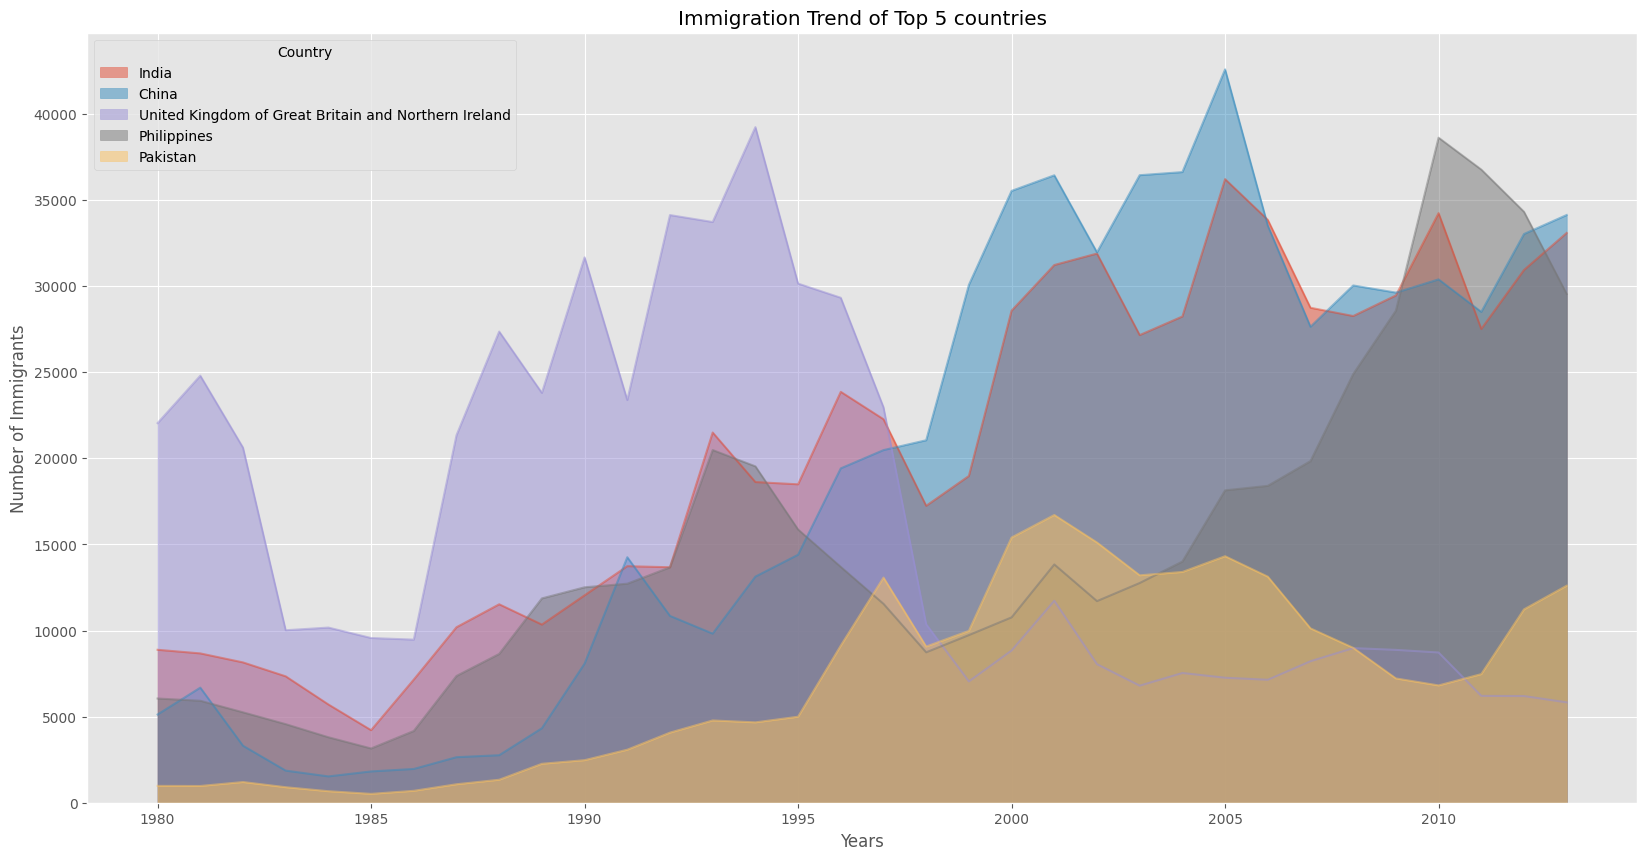

In [15]:
# Vamos a cambiar el valor del index del dataframe df_top5 a tipo integer para gráficar.
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind="area",
             stacked=False,
             figsize=(20,10)) # pasamos una tupla de tamaño (x,y).

plt.title("Immigration Trend of Top 5 countries")
plt.ylabel("Number of Immigrants")
plt.xlabel("Years")

plt.show()

El gráfico sin apilar tiene una transparencia predeterminada (valor alfa) de 0,5. Podemos modificar este valor pasando el parámetro `alpha`.

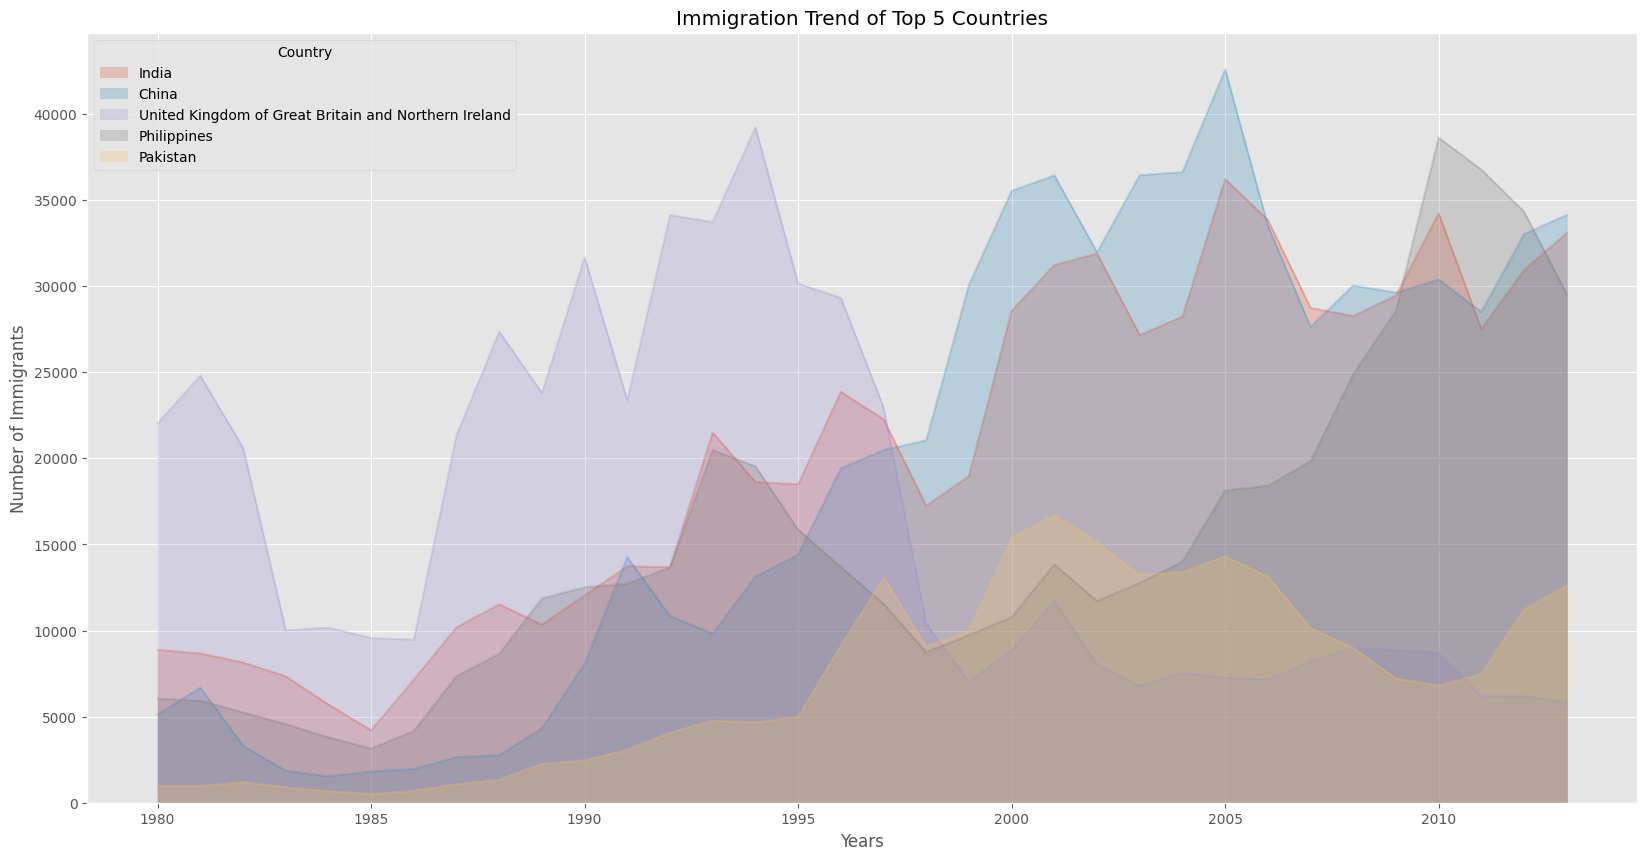

In [16]:
df_top5.plot(kind="area",
             alpha= 0.25,
             stacked=False,
             figsize=(20,10))

plt.title("Immigration Trend of Top 5 Countries")
plt.ylabel("Number of Immigrants")
plt.xlabel("Years")

plt.show()

### Dos Tipos de Gráficos

Como lo discutimos en el video, hay dos estilos/opciones con `matplotlib`，gráficar usando la capa Artística o gráficar usando la capa del Script.

\*\*Opción 1: Capa Scripting (procedural method) - usando matplotlib.pyplot as 'plt' \*\*

Puedes usar `plt` o `matplotlib.pyplot` y agregar más elementos llamando diferentes métodos de manera procedural; por ejemplo, `plt.title(...)` para agregar un titulo o `plt.xlabel(...)` par agregar el rotulo al eje-x.

```python
    # Option 1: This is what we have been using so far
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
```

\*\*Opción 2: Capa Artística (Object oriented method) - utilizando una instancia de Axes de Matplotlib (preferida) \*\*

Puedes utilizar una instancia de `Axes` de tu actual gráfico y guardarla en una variable (ej. `ax`). Puedes agregar mas elementos al hacer pequeños cambios en la sintaxis para llamar métodos (agregando "`set_`" al método previo). Por ejemplo, usa `ax.set_title()` en vez de `plt.title()` para agregar un titulo,  o `ax.set_xlabel()` en vez de `plt.xlabel()` para agregar un rotulo al eje-xs.

Esta opción a veces es mas transparente y flexible para usar en gráficos mas avanzados (en particular cuando tienes varios gráficos, como veras más adelante).

En este curso, nos apegaremos al **scripting layer**, excepto por algunas visualizaciones avanzadas donde necesitaremos la **artist layer** para manipular aspectos de los gráficos.

Text(0.5, 0, 'Years')

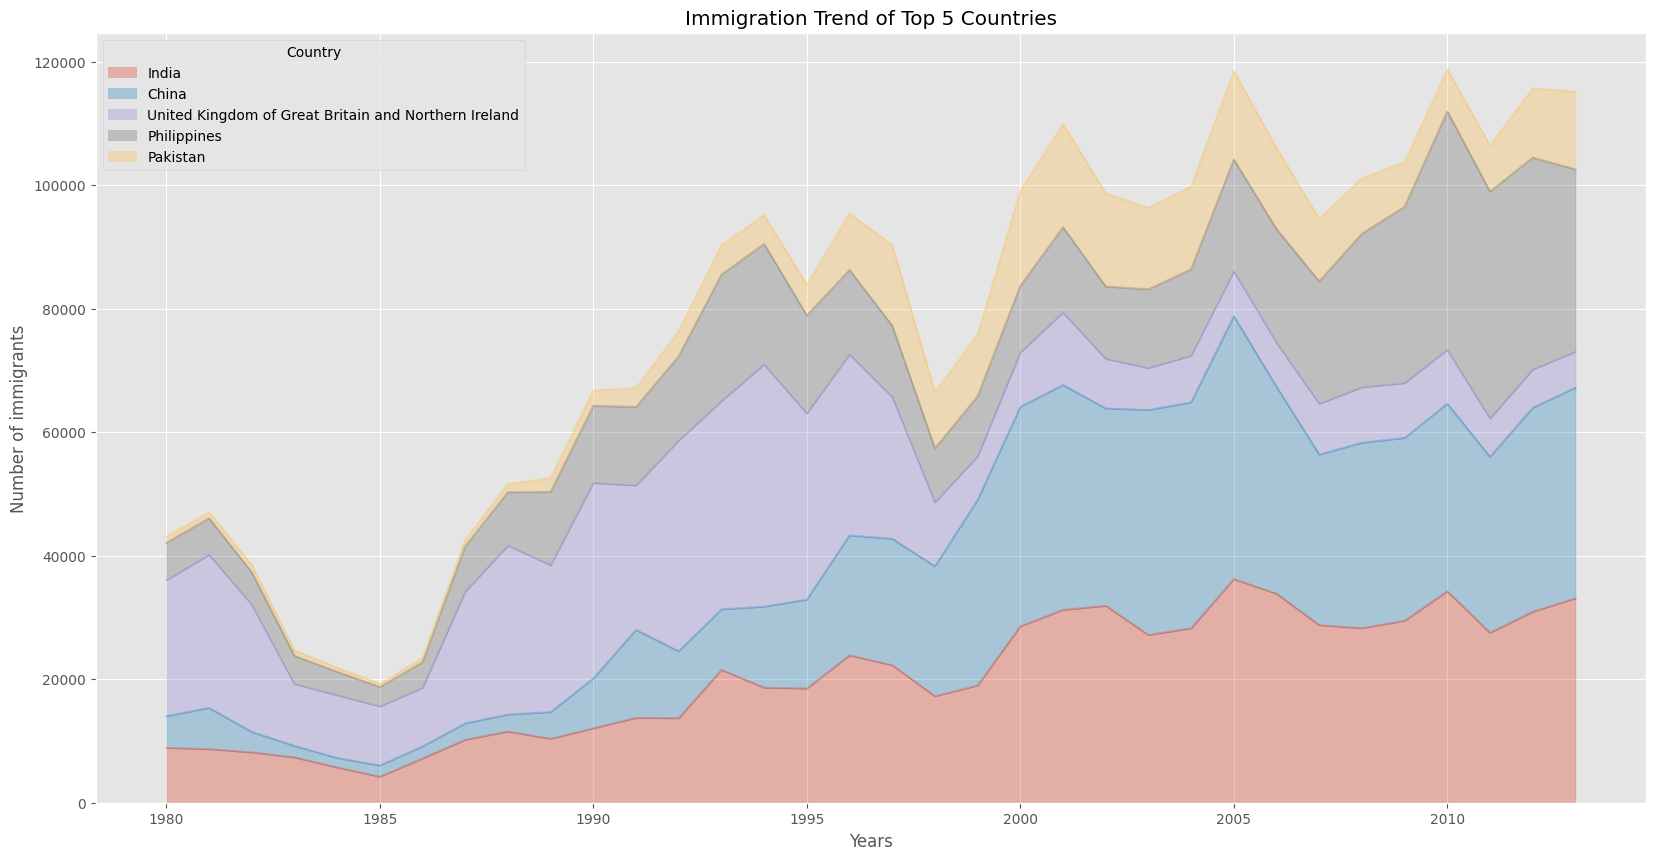

In [17]:
#Opción 2: opción preferida y con mayor flexibilidad.
ax=df_top5.plot(kind="area", alpha=0.35, figsize=(20,10))

ax.set_title("Immigration Trend of Top 5 Countries")
ax.set_ylabel("Number of immigrants")
ax.set_xlabel("Years")

**Pregunta**: Usa la capa artística (artist layer) para crear un gráfico de area desagrupado del top 5 de los países que contribuyen con la menor inmigración a Canada **desde** 1980 to 2013. Usa un valor de transparencia de 0.55.

Text(0.5, 0, 'Years')

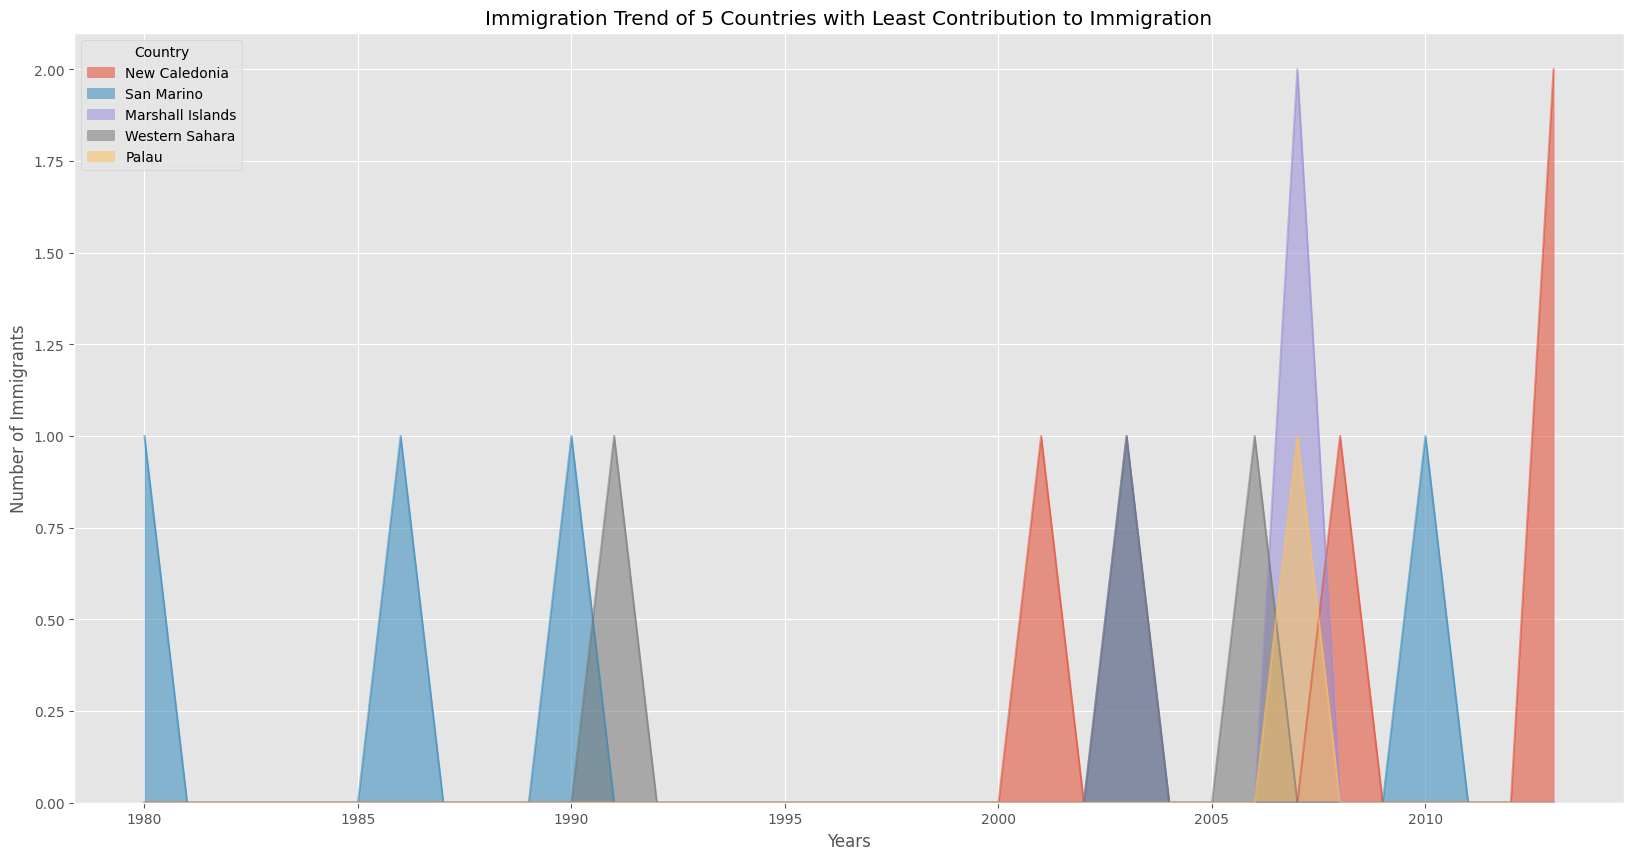

In [18]:
df_least5 = df_can.tail(5)
df_least5 = df_least5[years].transpose()
df_least5.head()

df_least5.index =df_least5.index.map(int) # vamos a cambiar el valor del indice de df_least5 a tipo integer para poder gráficar
ax= df_least5.plot(kind="area",
                   alpha=0.55,
                   stacked=False,
                   figsize=(20,10))

ax.set_title("Immigration Trend of 5 Countries with Least Contribution to Immigration")
ax.set_ylabel("Number of Immigrants")
ax.set_xlabel("Years")

# Histograma<a id="8"></a>

Un histograma es una manera de representar la *frecuencia* de la distribución numérica de un dataset. La forma en la que funciona es dividiendo el eje-x en *contenedores*, asignando cada punto de información en nuestro dataset a un contenedor, y luego cuenta el numero de puntos de información que han sido asignados a cada contenedor. Así que el eje-y es la frecuencia o el numero de puntos de información en cada contenedor. Nota que uno puede cambiar el tamaño del contenedor y usualmente hay que retocarlo para que la distribución se vea bien.

**Pregunta:** Cual es la frecuencia de la distribución del numero de (población) de nuevos inmigrantes de los distintos países a Canada en 2013?

Antes de proceder creamos el gráfico del histograma, primero examinemos la información dividida en intervalos- Para hacer esto, usaremos el método `histrogram` de **Numpy** para obtener el rango de los contenedores y la frecuencia del conteo de la siguiente manera:

In [19]:
# Veamos rápidamente la información del 2013.
df_can["2013"].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [20]:
# np.histogram retorna 2 valores.
count, bin_edges = np.histogram(df_can["2013"])

print(count) # Contador de frecuencia
print(bin_edges) # Rango de los contenedores, por defecto son 10 contenedores

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Por defecto, el método `histrogram` separa el dataset en 10 contenedores. La figura de abajo resume el rango de los contenedores y la frecuencia de distribución de inmigración del 2013. podemos ver que en 2013:

*   178 Países contribuyeron entre 0 a 3412.9 inmigrantes
*   11 Países contribuyeron entre 3412.9 a 6825.8 inmigrantes
*   1 País contribuyo entre 6285.8 a 10238.7 inmigrantes, y así sucesivamente 

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%202/images/Mod2Fig1-Histogram.jpg" align="center" width="800">


Podemos fácilmente gráficar esta distribución al `kind=hist`al `Gráfico`

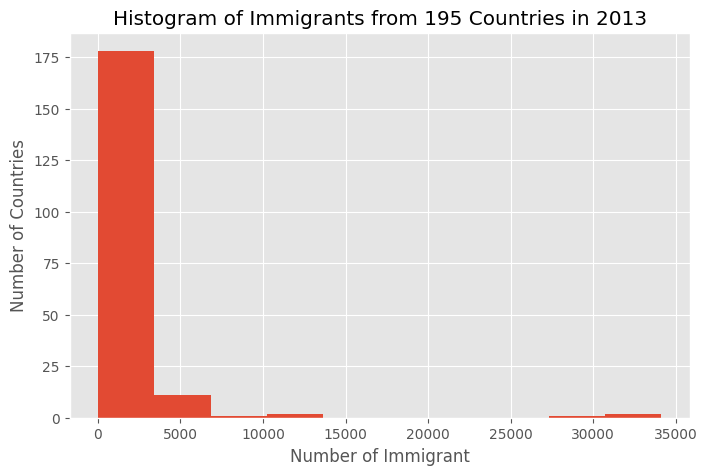

In [21]:
df_can["2013"].plot(kind="hist",figsize=(8,5))

# Agregamos un titulo al histograma.
plt.title("Histogram of Immigrants from 195 Countries in 2013")
# Agregamos el rotulo del eje Y
plt.ylabel("Number of Countries")
# Agregamos el rotulo del eje-X
plt.xlabel("Number of Immigrant")

plt.show()

En el gráfico de arriba el eje-X representa el rango de la población de inmigrantes en intervalos de 3412.9. El eje-y representa el numero de países que contribuyeron la población mencionada anteriormente.

Nota que los rótulos del eje-x no coinciden con el tamaño del contenedor. Esto puede ser arreglado al pasar la palabra clave `xticks` que el listado del tamaño de los contenedores, como a continuación:

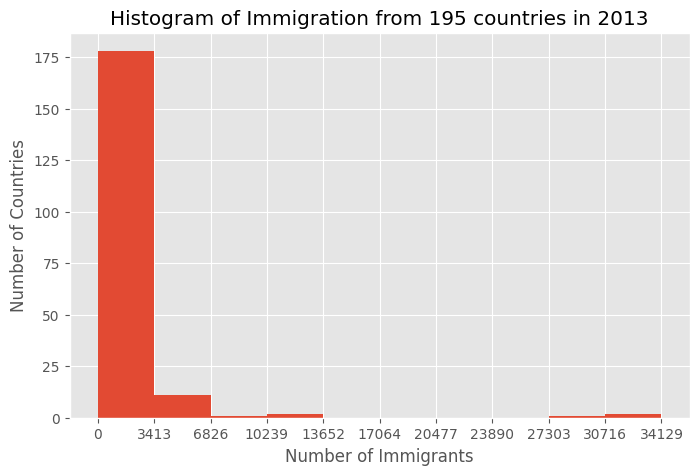

In [22]:
# "bin_edges" es un listado del intervalo de contenedores.
count, bin_edges = np.histogram(df_can["2013"])

df_can["2013"].plot(kind="hist",figsize=(8,5), xticks=bin_edges)

plt.title("Histogram of Immigration from 195 countries in 2013") # Agregamos un titulo a nuestro histograma
plt.ylabel("Number of Countries") # Agregamos un rotulo al eje-Y
plt.xlabel("Number of Immigrants") # Agregamos un rotulo al eje-x

plt.show()

Nota aparte: Pudimos usar `df_ca["2013"].plot.hist()`, en vez. De hecho a traves de esta lección, usar `some_data.plot(kind="type_plot",...)` es equivalente a `some_data.plot.type_plot(...)`. Eso es, pasar pasar el tipo de gráfico como argumento o se comporta como método.

Ver la documentación de para mas información *pandas* [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).


También podemos gráficar multiples histogramas en el mismo gráfico. Por ejemplo, intentemos responder la siguiente pregunta usando un histograma.

**Pregunta**: Cual es la distribución de inmigrantes para Dinamarca, Noruega, y Suecia para los años 1980-2013?

In [23]:
# Veamos rápidamente el dataset
df_can.loc[["Denmark","Norway","Sweden"],years]


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<Axes: ylabel='Frequency'>

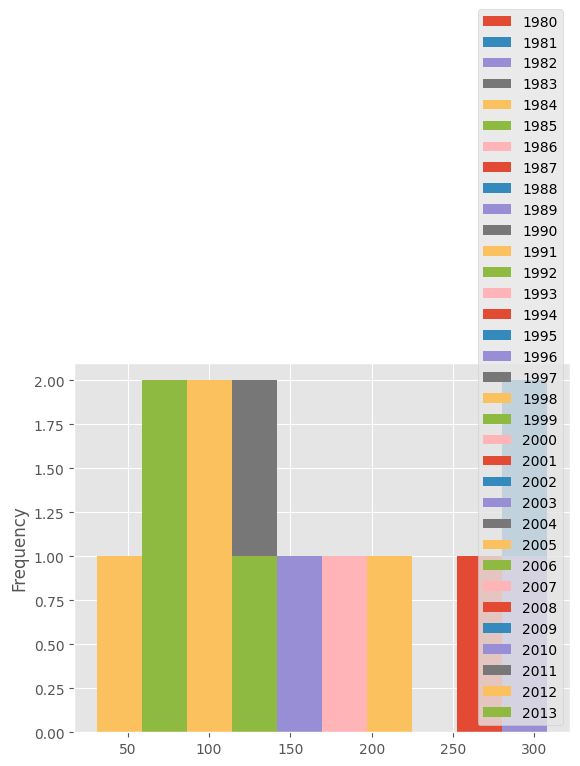

In [24]:
df_can.loc[["Denmark","Norway","Sweden"],years].plot.hist()

Esto no luce bien!

No te preocupes, frecuentemente te encontraras con este tipo de situaciones cuando crees gráficos. La solución depende de como esta estructurado el conjunto de datos subyacente.

En vez de gráficar la distribución de la frecuencia de la distribución de la población de los 3 países, *pandas* gráfica la frecuencia de la población para `years`.

Esto puede ser fácilmente arreglado, primero transpones el dataset, y luego gráficas como se muestra abajo.

In [25]:
# Transpose dataframe

df_t = df_can.loc[["Denmark","Norway","Sweden"],years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


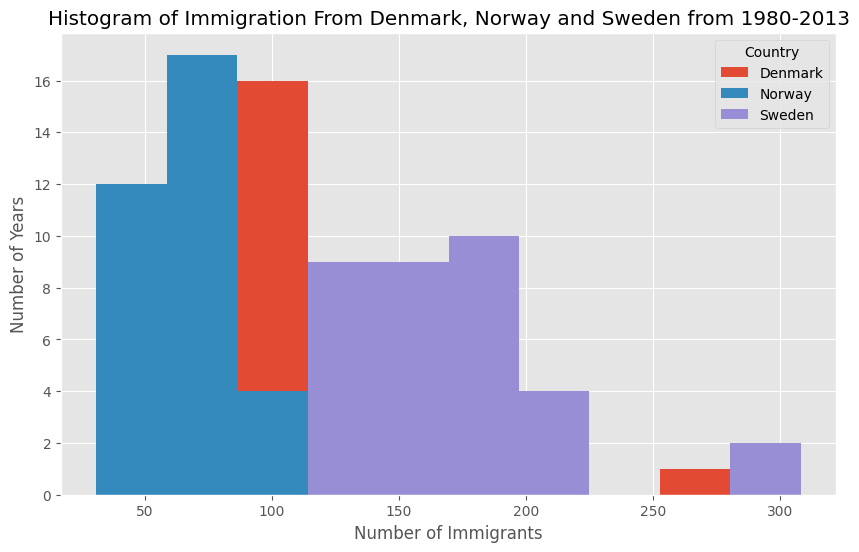

In [26]:
# Generamos el histograma
df_t.plot(kind="hist", figsize=(10,6))

plt.title("Histogram of Immigration From Denmark, Norway and Sweden from 1980-2013")
plt.ylabel("Number of Years")
plt.xlabel("Number of Immigrants")

plt.show()

Hagamos unas pocas modificaciones para mejorar el impacto y la estética del gráfico previo:

*   Incrementar el tamaño de los contenedores a 15 al pasar en el parámetro `bins`;
*   Ajustar la transparencia al 60% al pasarlo en el parámetro `alpha`;
*   Rotularemos el eje-X al pasarlo en el parámetro `x-label`;
*   Cambiaremos los colores del gráfico al pasarlo en el parámetros `color`.


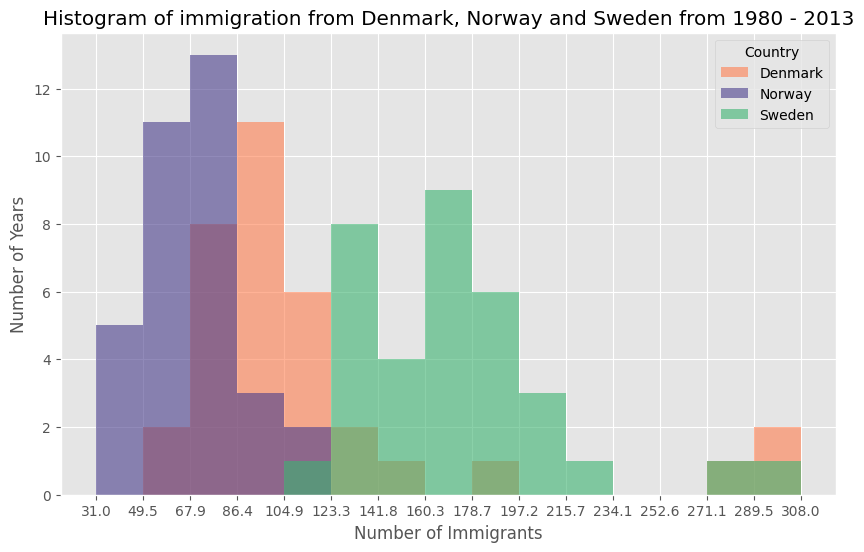

In [27]:
# Vamos a obtener los valores de x-tick.
count, bin_edges = np.histogram(df_t,15)

# Un histograma desagrupado.
df_t.plot(kind="hist",
          figsize=(10,6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=["coral","darkslateblue","mediumseagreen"]
          )

plt.title("Histogram of immigration from Denmark, Norway and Sweden from 1980 - 2013")
plt.ylabel("Number of Years")
plt.xlabel("Number of Immigrants")

plt.show()

Tip:
Para un listado completo de los colores disponibles en Matplotlib, ejecuta el siguiente código en el shell de python:

```python
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

Si no queremos que los gráficos se sobrepongan, podemos apilarlos usando el parámetro `stacked`. Vamos también a ajustar los rótulos min y max del eje-x para remover espacios extras en los bordes de los gráficos. Podemos pasar una tupla (min,max) usando el parámetro `xlim`,como se muestra abajo.

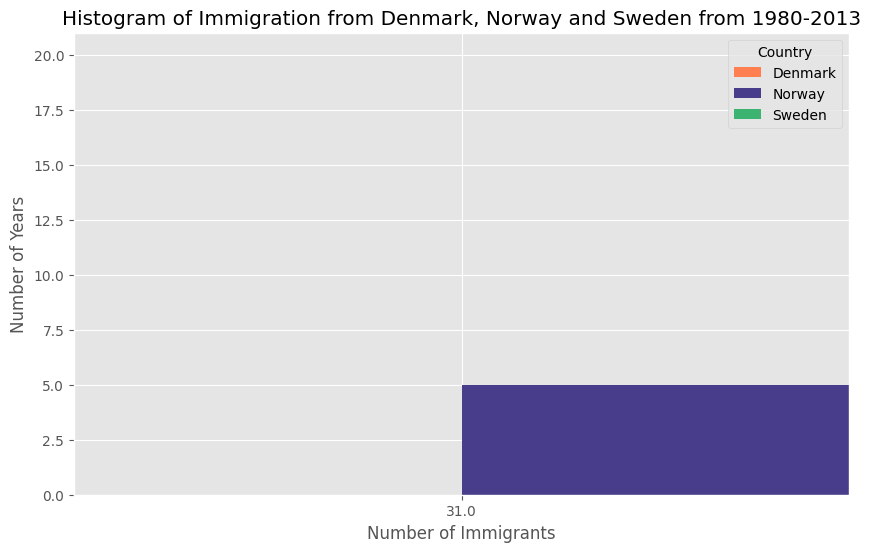

In [28]:
count,bin_edges = np.histogram(df_t,15)
xmin = bin_edges[0]-10 # Primero el valor del contenedor es de 31.0, agregando un margen de 10 para propósitos estéticos.
xmax = bin_edges[0]+10 # El último valor del contenedor es 308.0, agregando un margen de 10 par propósitos estéticos.

# Agrupando el histograma

df_t.plot(kind="hist",
          figsize=(10,6),
          bins=15,
          xticks=bin_edges,
          color=["coral","darkslateblue","mediumseagreen"],
          stacked=True,
          xlim=(xmin,xmax)
          )
plt.title("Histogram of Immigration from Denmark, Norway and Sweden from 1980-2013")
plt.ylabel("Number of Years")
plt.xlabel("Number of Immigrants")

plt.show()

**Pregunta**: Usa la capa de script para mostrar la distribución de inmigrantes de Grecia,Albania y Bulgaria para los años 1980 -2013? Usa un gráfico sobrepuesto con 15 contenedores y un valor de transparencia de 0.35.


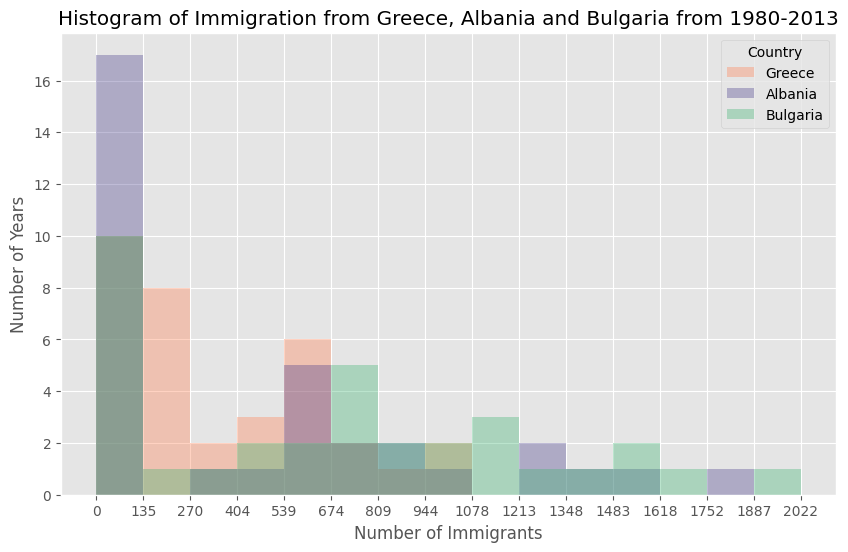

In [29]:
# Creamos un dataframe de los países de interés(cof).
df_cof = df_can.loc[["Greece","Albania","Bulgaria"],years]

# Transponemos el dataframe.
df_cof = df_cof.transpose()

# Vamos a obtener los datos de x-tick.
count, bin_edges = np.histogram(df_cof,15)

# Des-agrupamos el histograma.
df_cof.plot(kind="hist",
            figsize = (10,6),
            bins = 15,
            alpha = 0.35,
            xticks = bin_edges,
            color =["coral","darkslateblue","mediumseagreen"]
            )

plt.title("Histogram of Immigration from Greece, Albania and Bulgaria from 1980-2013")
plt.ylabel("Number of Years")
plt.xlabel("Number of Immigrants")

plt.show()

# Bar Charts (Dataframe) <a id="10"></a>

Un gráfico de barra es una forma de representar información donde el *largo* (*length*) de las barras representan la magnitud/tamaño de la característica/variable. Los gráficos de barra usualmente representan variables numéricas o categóricas agrupadas en intervalos.

Para crear un gráfico de barra, podemos pasar uno o dos argumentos ven el parámetro `kind` en `plot()`:

*   `kind=bar` Crea un gráfico de barra *`vertical`* 
*   `kind=barh` Crea un gráfico de barra *`horizontal`* 

**Gráfico de barra vertical**

En los gráficos de barra vertical, el eje-x es usado para rotular, y el largo de la barra en el eje-y corresponde a la magnitud de la variable que esta siendo medida. Gráficos  de barras verticales son particularmente útiles en analizar series de información en tiempo. La desventaja que carecen de espacio para el rotulado al pie de cada barra.

**Vamos a comenzar por analizar el efecto de la crisis financiera de Islandia:**

Entre el  2008 - 2011 La crisis económica de Islandia fue uno de las mayores crisis políticas y económicas en Islandia. Relativo al tamaño de su economía, El colapso del sistema bancario fue la experiencia mas grande de cualquier país en la historia de la economía. La crisis derivo en una severa depresión e inestabilidad política entre los años 2008-2011 

**Pregunta:** Vamos a comparar los números de los inmigrantes Islandeses (country = 'Iceland') a Canada entre los años 1980 al 2013.


In [30]:
# Paso 1: Obtenemos la información.
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

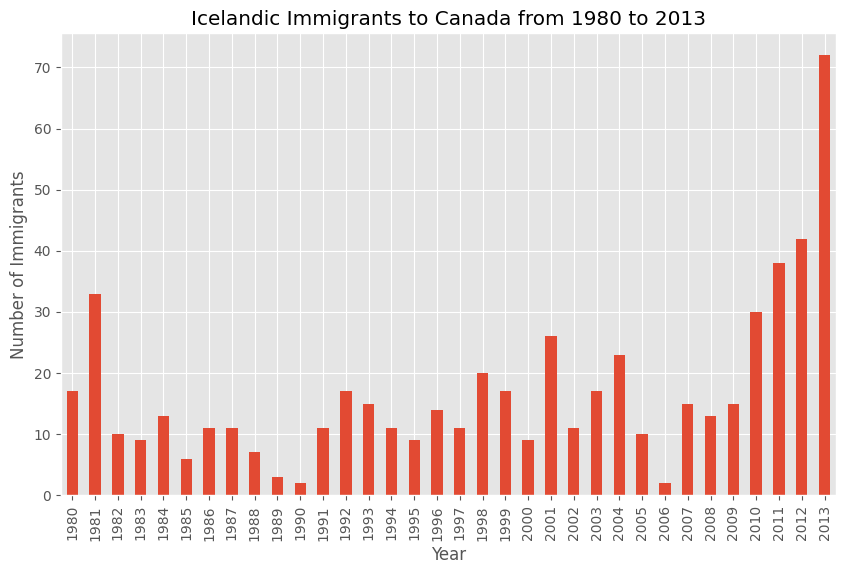

In [31]:
# Paso 2: Gráficamos la información.
df_iceland.plot(kind="bar", figsize=(10,6))

plt.xlabel("Year") # Agregamos el rotulo del eje-x al gráfico
plt.ylabel("Number of Immigrants") # Agregamos el rotulo del eje-y al gráfico
plt.title("Icelandic Immigrants to Canada from 1980 to 2013") #Agregamos un titulo al gráfico

plt.show()

El gráfico de barra mostrado arriba muestra el numero total de inmigrantes de cada año. Podemos ver claramente el impacto de la crisis financiera; el numero de inmigrantes hacia Canada comenzó a crecer rápidamente después del 2008.

Vamos a anotar esto en el gráfico utilizando el método *`annotate`* de la capa de *`scripting`* o la interfaz *`pyplot`*. Pasaremos los siguientes parámetros:

*   `s`: str, el texto de la anotación.
*   `xy`: Tupla especificando el punto (x,y) de la anotación (en este caso, el punto final de la flecha).
*   `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
*   `xycoords`: El sistema de coordenadas en el que se proporcionan las coordenadas xy es 'datos', utiliza el sistema de coordenadas del objeto que se está anotando (por defecto)
*   `arrowprops`: Toma el diccionario de las propiedades para dibujar una flecha:
    *   `arrowstyle`: Especifica el estilo de la flecha, `'->'` es una flecha estándar.
    *   `connectionstyle`: Especifica el tipo de conexión. `arc3` es una linea recta.
    *   `color`: Especifica el color de la flecha.
    *   `lw`: Especifica el ancho de la flecha.

Te invito a que leas la documentación de Matplotlib para más detalles sobre annotations:
<http://matplotlib.orsg/api/pyplot_api.html#matplotlib.pyplot.annotate>.


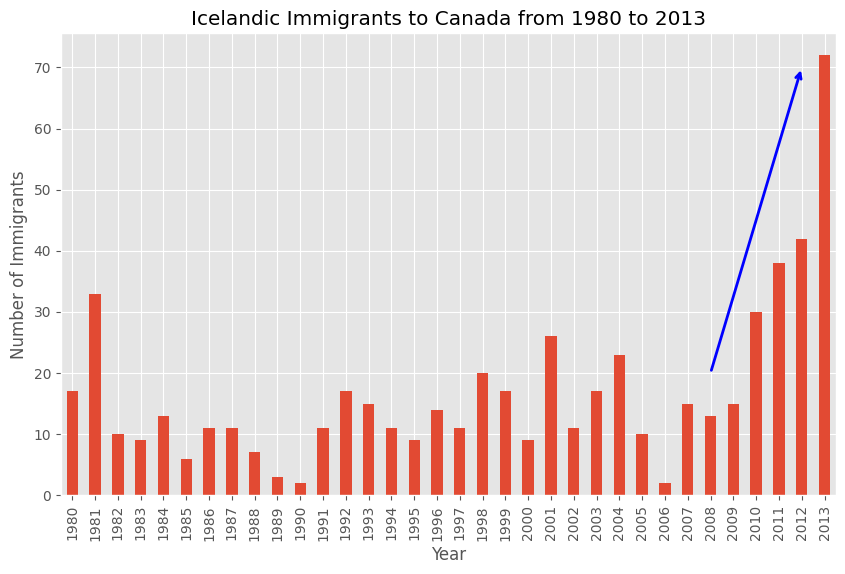

In [32]:
df_iceland.plot(kind="bar", figsize=(10,6), rot = 90) # Rota los xticks (puntos etiquetados en el eje x) en 90 grados

plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.title("Icelandic Immigrants to Canada from 1980 to 2013")

# Annotate arrow

plt.annotate("", #s :str. se dejara en blanco para no dejar texto
             xy=(32,70), # Pone la cabeza de la flecha al punto (year 2012, pop 70)
             xytext=(28,20), # Pone la base de la flecha en el punto (year 2008, pop 20)
             xycoords="data", # Usara el sistema de coordenadas del objeto que esta siendo anotado
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="blue",lw=2)
            )

plt.show()

También vamos a anotar un texto que ira sobre la flecha. Pasaremos los siguientes parámetros de forma adicional We will pass in the following additional parameters:

*   `rotation`: Rota el angulo del texto en grados(contra el sentido del reloj)
*   `va`: Alinea el texto de forma vertical \[‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
*   `ha`: Alinea el texto de forma horizontal \[‘center’ | ‘right’ | ‘left’]

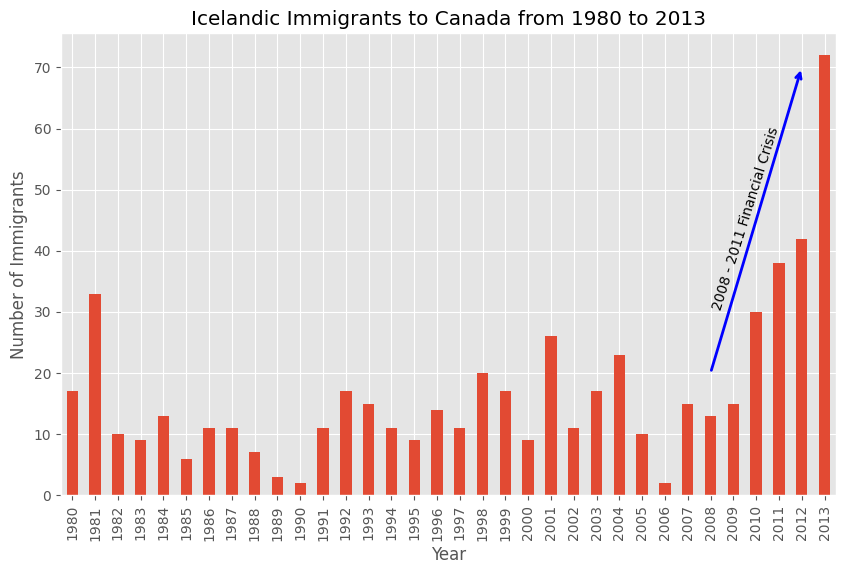

In [34]:
df_iceland.plot(kind="bar", figsize=(10,6),rot=90)

plt.xlabel("Year")
plt.ylabel("Number of Immigrants")
plt.title("Icelandic Immigrants to Canada from 1980 to 2013")

# Annotate arrow
plt.annotate("", # s: str. se dejara en blanco para no poner texto.
             xy =(32,70), # Pone la cabeza de la flecha en el punto (year 2012, pop 70)
             xytext=(28,20), # Coloca la base de la flecha en el punto (year 2008, pop 20)
             xycoords="data", # Usaremos el sistema de coordenadas del objeto que esta siendo anotado
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="blue", lw=2)
             )


# Annotate text
plt.annotate("2008 - 2011 Financial Crisis", # texto mostrado
             xy=(28,30), # Comienza el texto en el punto (year 2008,pop 30)
             rotation = 72.5, #basado en prueba y error para hacer coincidir con la flecha.
             va="bottom", # Queremos que el texto se alineen vertical "bottom"
             ha="left", # Queremos que el texto se alinee de forma horizontal.
             )

plt.show()

**Gráfico de barras Horizontal**

A veces es mas practico representar la información de manera horizontal, especialmente si necesitas espacio para poder rotular las barras. En los gráficos de barra horizontal , el `eje-y` es usado para rotular, y el largo de la barra del `eje-x` corresponde a la magnitud de la variable que esta siendo medida. Como veras, hay mas espacio en el `eje-y` para rotular variables categóricas

**Pregunta:** Usando la capa de scripting y el conjunto de datos `df_can`, crea un gráfico de barras horizontal que muestre el número total de inmigrantes a Canadá de los 15 principales países, para el período de 1980 a 2013. Etiqueta cada país con el recuento total de inmigrantes.

Paso 1: Prepara la información para los primeros 15 países.

In [41]:
# Ordenamos el dataframe sobre la columna "Total" de forma descendente

df_can.sort_values(by="Total", ascending=True, inplace=True)

# Obtenemos los primeros 15 Países

df_top15 = df_can["Total"].tail(15)

df_top15

Country
Romania                                                  93210
Viet Nam                                                 95955
Jamaica                                                 103233
France                                                  107362
Lebanon                                                 113950
Poland                                                  138378
Republic of Korea                                       141570
Sri Lanka                                               148173
Iran (Islamic Republic of)                              174751
United States of America                                231744
Pakistan                                                240622
Philippines                                             505340
United Kingdom of Great Britain and Northern Ireland    529455
China                                                   654839
India                                                   683024
Name: Total, dtype: int64

Paso 2: Gráfica la información:

1.  Usa `kind='barh'` para generar un gráfico de barras con barras horizontales.
2.  Asegúrate que eliges un buen tamaño para el gráfico  rótulos de los ejes y poner un titulo Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
3.  Crea un Loop a traves de los países para anotar la población, usa la función anotate de la interface scripting

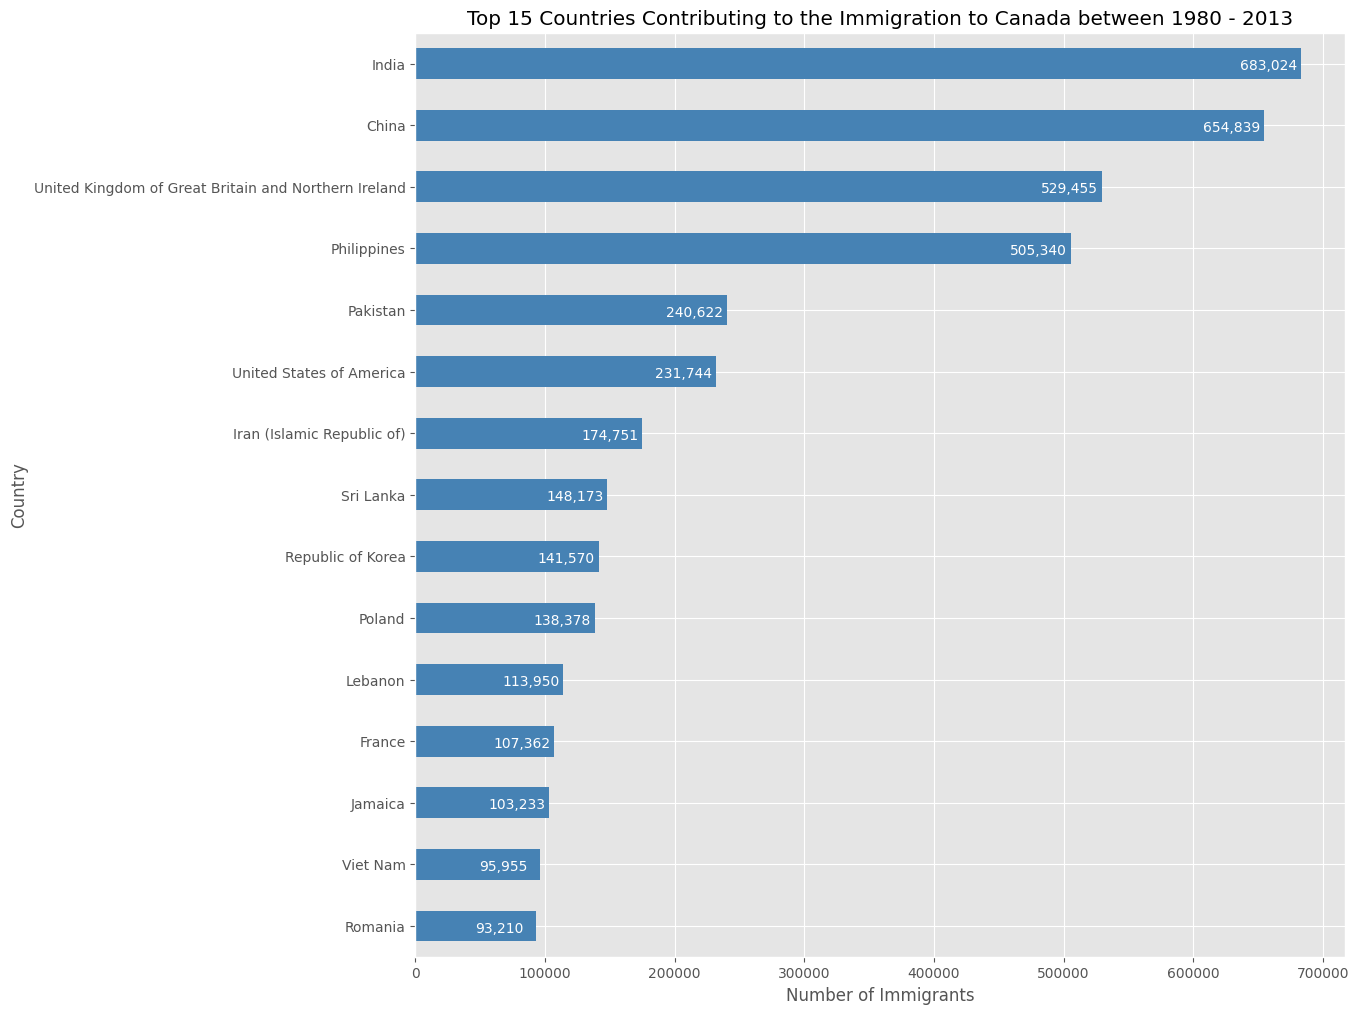

In [43]:
df_top15.plot(kind="barh",figsize=(12,12),color="steelblue")
plt.xlabel("Number of Immigrants")
plt.title("Top 15 Countries Contributing to the Immigration to Canada between 1980 - 2013")

#Annotate the value to each Country
for index, value in enumerate(df_top15):
    label = format(int(value),",")

    plt.annotate(label,xy=(value - 47000, index - 0.10), color= "white")

plt.show()